In [26]:
from Bio import PDB
from Bio.PDB.Polypeptide import PPBuilder
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import numpy as np
import os
from PIL import Image
from sklearn.decomposition import PCA
import sys
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplot inline

UsageError: Line magic function `%matplot` not found.


In [5]:
# Get and parse all pdb files in a folder

def parsePdbFiles(dir_path):
    structures = []
    
    files = os.listdir(dir_path)
    pdb_files = [(f, os.path.join(dir_path, f)) for f in files if f.endswith(".pdb")]
    
    for pdb, pdb_path in pdb_files:
        parser = PDB.PDBParser()
        structure = parser.get_structure(pdb, pdb_path) 
        structures.append(structure)
        
    return structures

In [55]:
structures = parsePdbFiles("pdb_sample/sample")
print structures

/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6893.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6941.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6989.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 7037.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 7270.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 7493.
  PDBConstru

[<Structure id=1gji.pdb>, <Structure id=1lua.pdb>, <Structure id=1a3q.pdb>, <Structure id=1nvt.pdb>, <Structure id=1a02.pdb>, <Structure id=1fy7.pdb>, <Structure id=1a4i.pdb>, <Structure id=1npd.pdb>, <Structure id=1imh.pdb>]


/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4942.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4986.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 5030.
  PDBConstructionWarning)
/usr/local/lib/python2.7/site-packages/Bio/PDB/StructureBuilder.py:90: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 5178.
  PDBConstructionWarning)


In [56]:
def AminoacidPairDistanceMatrix(structure):
    aa_vectors = {} # aminoacid vector dictionary {aa_id: aa_carbon_coordinate} 

    aa_id = 0 # aminoacid id
    for model in structure:
        for chain in model:
            if chain.id == protein_chain_dict[str(structure.id)]:
                for residue in chain:
                    if aa_id<273: # Remove aminoacids after limit
                        try:
                            coords_CA = residue['CA'].coord # x,y,z coordinates of the C-alpha atom
                            aa_vectors[aa_id] = coords_CA
                        except:
                            aa_id += 1
                            continue
                        aa_id += 1
                    else:
                        break

    aa_distance_matrix = [] # Aminoacid pair distance matrix
    for vec in aa_vectors.values():
        dist_vec = []
        for vec_ in aa_vectors.values():
            distance = np.linalg.norm(vec-vec_)
            dist_vec.append(distance)
        aa_distance_matrix.append(dist_vec)
        
    return np.array(aa_distance_matrix)

In [57]:
protein_chain_dict = {"1m4d.pdb": "B", "1n71.pdb":"B", "1q2y.pdb":"A", "1a02.pdb":"N","1a3q.pdb":"B", 
                      "1gji.pdb": "B", "1a4i.pdb":"A", "1b0a.pdb": "A", "1ee9.pdb": "A",
                     "1bo4.pdb": "B", "1cjw.pdb": "A", "1fy7.pdb": "A",
                     "1gpj.pdb": "A", "1gq2.pdb": "A", "1nvt.pdb": "B",
                     "1oy3.pdb": "B", "1ttu.pdb": "A", "1imh.pdb": "D",
                     "1gg2.pdb": "A", "1lua.pdb": "A", "1npd.pdb": "A",
                     "1ygh.pdb": "B", "1vkc.pdb":"B",  "1wwz.pdb":"B", 
                     "1y9w.pdb":"B",  "1xeb.pdb":"G", "1y7r.pdb": "B"}

In [58]:
def RemoveSymmetry(matrix):
    flatten = []
    row = 0
    for i in range(1, len(matrix)):
        flatten += matrix[row][i:].tolist()
        row+=1
    return np.array(flatten)

In [59]:
def protein_vector_dict(structures, removeSymmetry=True):
    protein_matrix_dict = {}
    for protein in structures:
        protein_matrix = AminoacidPairDistanceMatrix(protein)
        if removeSymmetry == True:
            protein_matrix = RemoveSymmetry(protein_matrix)
        else:
            protein_matrix = protein_matrix.flatten()
        protein_matrix_dict[protein.id] = protein_matrix
        print(protein.id, protein_matrix.shape)
    return protein_matrix_dict

## Visualization 

In [11]:
structures[0].id

'1gji.pdb'

In [12]:
protein_matrix = AminoacidPairDistanceMatrix(structures[0])
img = Image.fromarray(protein_matrix)
img.show()

In [21]:
flatten = []
row = 0
for i in range(1, len(protein_matrix)):
    rest = [0] * i
    flatten.append(rest + protein_matrix[row][i:].tolist())
    row+=1

In [23]:
img = Image.fromarray(np.array(flatten))
img.show()

#  ----

In [60]:
protein_matrix_dict = protein_vector_dict(structures, removeSymmetry=True)

('1gji.pdb', (37128,))
('1lua.pdb', (37128,))
('1a3q.pdb', (37128,))
('1nvt.pdb', (37128,))
('1a02.pdb', (37128,))
('1fy7.pdb', (37128,))
('1a4i.pdb', (37128,))
('1npd.pdb', (37128,))
('1imh.pdb', (37128,))


In [13]:
protein_matrix_dict2 = protein_vector_dict(structures, removeSymmetry=False)

('1gji.pdb', (74529,))
('1a3q.pdb', (74529,))
('1nvt.pdb', (74529,))
('1a02.pdb', (74529,))
('1fy7.pdb', (74529,))
('1a4i.pdb', (74529,))
('1imh.pdb', (74529,))


In [62]:
protein_matrix_dict.keys()

['1a4i.pdb',
 '1imh.pdb',
 '1a3q.pdb',
 '1nvt.pdb',
 '1gji.pdb',
 '1a02.pdb',
 '1fy7.pdb']

In [29]:
def LinearAutoencoder(X_train, n_input, n_hidden, n_iteration):
    n_inputs = n_input # input is flatten version of input matrix
    n_hidden = n_hidden 
    n_outputs = n_inputs

    learning_rate = 0.01

    X = tf.placeholder(tf.float32, shape=[None, n_inputs])
    hidden = fully_connected(X, n_hidden, activation_fn=None)
    outputs = fully_connected(hidden, n_outputs, activation_fn=None)

    reconstruction_loss = tf.reduce_sum(tf.square(outputs - X)) # MSE

    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(reconstruction_loss)

    init = tf.global_variables_initializer()

    n_iterations = n_iteration # Number of iterations
    codings = hidden # the output of the hidden layer provides the codings
    
    with tf.Session() as sess: 
        init.run()
        loss = []
        for iteration in range(n_iterations):
            iteration_loss = []
            for protein in X_train:
                _, loss_val = sess.run([training_op, reconstruction_loss], feed_dict={X: [protein]}) # no labels (unsupervised)
                iteration_loss.append(loss_val)
            loss.append(sum(iteration_loss)/float(len(X_train)))
            
        # Test on the same protein
        codings_val = codings.eval(feed_dict={X: X_train})
        
    return codings_val, loss

In [19]:
def StackedAutoencoderWithTiedWeights(X_train, n_input, n_hidden1, n_hidden2, n_epochs):
    n_inputs = n_input # for pair distance matrix 
    n_hidden1 = n_hidden1
    n_hidden2 = n_hidden2 # codings 
    n_hidden3 = n_hidden1 
    n_outputs = n_inputs

    learning_rate = 0.01
    l2_reg = 0.001

    activation = tf.nn.elu
    regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
    initializer = tf.contrib.layers.variance_scaling_initializer()

    X = tf.placeholder(tf.float32, shape=[None, n_inputs])

    weights1_init = initializer([n_inputs, n_hidden1])
    weights2_init = initializer([n_hidden1, n_hidden2])

    weights1 = tf.Variable(weights1_init, dtype=tf.float32, name="weights1") 
    weights2 = tf.Variable(weights2_init, dtype=tf.float32, name="weights2") 
    weights3 = tf.transpose(weights2, name="weights3") # tied weights
    weights4 = tf.transpose(weights1, name="weights4") # tied weights

    biases1 = tf.Variable(tf.zeros(n_hidden1), name="biases1")
    biases2 = tf.Variable(tf.zeros(n_hidden2), name="biases2")
    biases3 = tf.Variable(tf.zeros(n_hidden3), name="biases3")
    biases4 = tf.Variable(tf.zeros(n_outputs), name="biases4")

    hidden1 = activation(tf.matmul(X, weights1) + biases1)
    hidden2 = activation(tf.matmul(hidden1, weights2) + biases2)
    hidden3 = activation(tf.matmul(hidden2, weights3) + biases3)
    outputs = tf.matmul(hidden3, weights4) + biases4

    reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))
    reg_loss = regularizer(weights1) + regularizer(weights2)

    loss = reconstruction_loss + reg_loss

    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)
    n_epochs = n_epochs

    init = tf.global_variables_initializer()
    
    with tf.Session() as sess: 
        init.run() 
        loss_control = []
        for epoch in range(n_epochs):
            print("Iteration ",epoch)
            iteration_loss = []
            for protein in X_train:
                _, loss_val = sess.run([training_op, loss], feed_dict={X: [protein]})
                iteration_loss.append(loss_val)
            loss_control.append(sum(iteration_loss)/float(len(X_train)))
        # Test on the same protein
        codings_val = hidden2.eval(feed_dict={X: X_train})
        
    return codings_val, loss_control

In [61]:
# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

reset_graph()

from functools import partial

def train_autoencoder(X_train, n_neurons, n_epochs,
                      learning_rate = 0.01, l2_reg = 0.0005, seed=42,
                      hidden_activation=tf.nn.elu,
                      output_activation=tf.nn.elu):
    graph = tf.Graph()
    with graph.as_default():
        tf.set_random_seed(seed)

        n_inputs = X_train.shape[1]

        X = tf.placeholder(tf.float32, shape=[None, n_inputs])
        
        my_dense_layer = partial(
            tf.layers.dense,
            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(l2_reg))

        hidden = my_dense_layer(X, n_neurons, activation=hidden_activation, name="hidden")
        outputs = my_dense_layer(hidden, n_inputs, activation=output_activation, name="outputs")

        reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

        reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
        loss = tf.add_n([reconstruction_loss] + reg_losses)

        optimizer = tf.train.AdamOptimizer(learning_rate)
        training_op = optimizer.minimize(loss)

        init = tf.global_variables_initializer()

    with tf.Session(graph=graph) as sess:
        init.run()
        for epoch in range(n_epochs):
            for protein in X_train:
                #print("\r{}%".format(100 * iteration // n_batches), end="")
                sys.stdout.flush()
                sess.run(training_op, feed_dict={X: [protein]})
            loss_train = reconstruction_loss.eval(feed_dict={X: [protein]})
            print("\r{}".format(epoch), "Train MSE:", loss_train)
        params = dict([(var.name, var.eval()) for var in tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)])
        hidden_val = hidden.eval(feed_dict={X: X_train})
        return hidden_val, params["hidden/kernel:0"], params["hidden/bias:0"], params["outputs/kernel:0"], params["outputs/bias:0"]

In [62]:
labels, features = protein_matrix_dict.keys(), protein_matrix_dict.values()

## Linear Autoencoder

In [42]:
(33*33)/2 - 33/2

528

In [43]:
input_size = len(features[0])
features500d, loss = LinearAutoencoder(features, input_size, 528, 10)

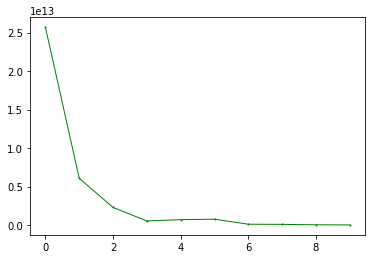

In [45]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [64]:
print labels[4]

1gji.pdb


In [85]:
new = []
protein_f = features500d[4].tolist()
start = 0
end = 33
for i in range(0, 33):
    print len(protein_f[start:end])
    rest = [0] * (i+1)
    new.append(rest + protein_f[start:end])
    start = end
    end = end + 33 - (i+1)

33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
3
0
0
0
0
0
0
0


In [83]:
len(new[-4])

30

In [74]:
img = Image.fromarray(np.array(new))
img.show()

TypeError: Cannot handle this data type

In [47]:
# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(features500d))
features2d

array([[-31998.645 ,  -5529.2896],
       [ 60714.066 , -22337.393 ],
       [ 19679.18  ,  24654.031 ],
       [  2772.9717,  11424.474 ],
       [ 19308.75  ,   7625.1963],
       [-23486.941 ,  -9743.307 ],
       [-46989.4   ,  -6093.7104]], dtype=float32)

In [48]:
result_dict = dict(zip(labels, features2d))

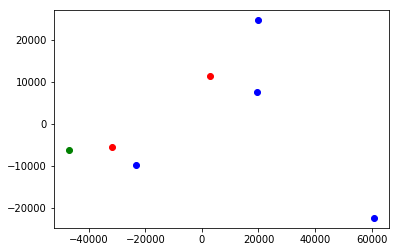

In [49]:
C = ["1a4i.pdb", "1nvt.pdb", '1lua.pdb', '1npd.pdb']
B = ["1a02.pdb","1a3q.pdb", "1gji.pdb", "1imh.pdb"]
D = ["1fy7.pdb"]

fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()

## Stacked Autoencoder 1000x500

In [52]:
labels, features = protein_matrix_dict.keys(), protein_matrix_dict.values()
input_size = len(features[0])
features500d, loss = StackedAutoencoderWithTiedWeights(features, input_size, 1000,500, 10)

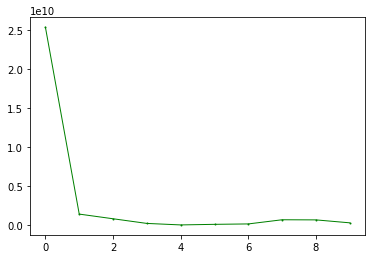

In [53]:
# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

In [54]:
# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(features500d))
features2d

array([[-19983.092  ,  -1153.4369 ],
       [ 21461.709  ,   -776.66223],
       [ 13325.104  ,   -454.39514],
       [-17511.71   ,   -214.20016],
       [  3745.2043 ,  -1223.5824 ],
       [  2343.534  ,   2345.7725 ],
       [ -3380.7559 ,   1476.5101 ]], dtype=float32)

In [55]:
result_dict = dict(zip(labels, features2d))

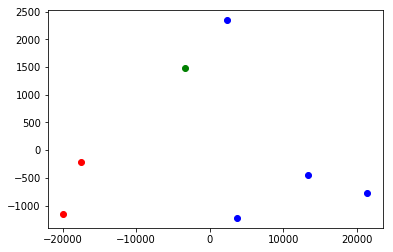

In [56]:
C = ["1a4i.pdb", "1nvt.pdb"]
B = ["1a02.pdb","1a3q.pdb", "1gji.pdb", "1imh.pdb"]
D = ["1fy7.pdb"]

fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()

## Stacked Autoencoder 2000x500

('Iteration ', 0)
('Iteration ', 1)
('Iteration ', 2)
('Iteration ', 3)
('Iteration ', 4)


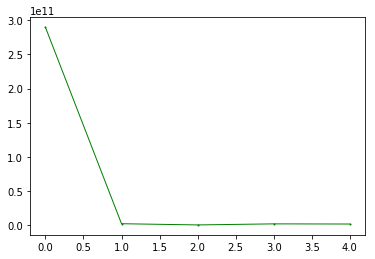

In [21]:
labels, features = protein_matrix_dict.keys(), protein_matrix_dict.values()
input_size = len(features[0])
features500d, loss = StackedAutoencoderWithTiedWeights(features, input_size, 2000,500, 5)

# LOSS GRAPH
fig, ax = plt.subplots()
ax.plot(range(0,len(loss)), loss, 'go-', linewidth=1, markersize=1)

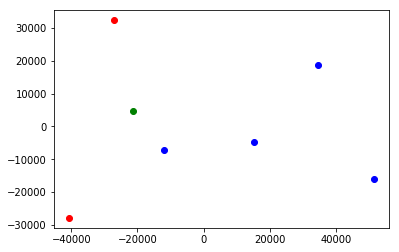

In [23]:
C = ["1a4i.pdb", "1nvt.pdb"]
B = ["1a02.pdb","1a3q.pdb", "1gji.pdb", "1imh.pdb"]
D = ["1fy7.pdb"]

# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(features500d))
result_dict = dict(zip(labels, features2d))

fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()

### Training one Autoencoder at a time in multiple graphs

The first one is trained on the training data, and the second is trained on the previous Autoencoder's hidden layer output:

In [63]:
labels, features = protein_matrix_dict.keys(), protein_matrix_dict.values()
input_size = len(features[0])

Shape of the Stacked Autoencoder will be: __input_size x 5.000 x 500 x 5.000 x input_size__ 

In [64]:
hidden_output, W1, b1, W4, b4 = train_autoencoder(np.array(features), n_neurons=5000, n_epochs=5,output_activation=None)

('\r0', 'Train MSE:', 104985260.0)
('\r1', 'Train MSE:', 21520016.0)
('\r2', 'Train MSE:', 10293233.0)
('\r3', 'Train MSE:', 86485.57)
('\r4', 'Train MSE:', 508639.28)


In [65]:
_, W2, b2, W3, b3 = train_autoencoder(hidden_output, n_neurons=500, n_epochs=5)

('\r0', 'Train MSE:', 136811.03)
('\r1', 'Train MSE:', 29493.514)
('\r2', 'Train MSE:', 12101.557)
('\r3', 'Train MSE:', 1364.7844)
('\r4', 'Train MSE:', 3626.6528)


Finally, we can create a Stacked Autoencoder by simply reusing the weights and biases from the Autoencoders we just trained:

In [66]:
reset_graph()

n_inputs = input_size

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
hidden1 = tf.nn.elu(tf.matmul(X, W1) + b1)
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2) + b2)
hidden3 = tf.nn.elu(tf.matmul(hidden2, W3) + b3)
outputs = tf.matmul(hidden3, W4) + b4

In [67]:
def test_autoencoder(X_train):
    init = tf.global_variables_initializer()
    features = []
    with tf.Session() as sess:
        init.run()
        for protein in X_train:
            codings_val = hidden2.eval(feed_dict={X: [protein]})
            features.append(codings_val[0])
    return features

In [68]:
new_features = test_autoencoder(features)

In [46]:
nn=[]
for n in new_features:
    nn.append(n[0])

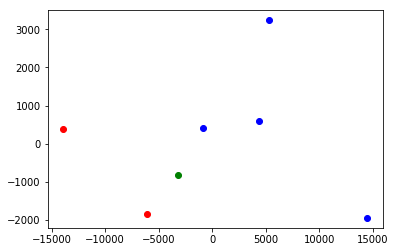

In [47]:
C = ["1a4i.pdb", "1nvt.pdb"]
B = ["1a02.pdb","1a3q.pdb", "1gji.pdb", "1imh.pdb"]
D = ["1fy7.pdb"]

# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(nn))
result_dict = dict(zip(labels, features2d))

fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()

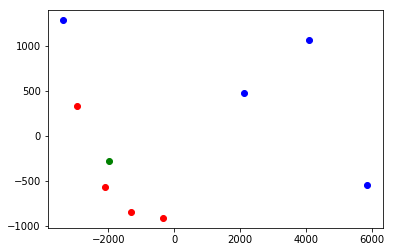

In [72]:
C = ["1a4i.pdb", "1nvt.pdb", '1lua.pdb', '1npd.pdb']
B = ["1a02.pdb","1a3q.pdb", "1gji.pdb", "1imh.pdb"]
D = ["1fy7.pdb"]


# PCA
pca = PCA(n_components=2)
features2d = pca.fit_transform(np.array(new_features))
result_dict = dict(zip(labels, features2d))

fig, ax = plt.subplots()

for protein, f2 in result_dict.items():
    if protein in B:
        ax.plot(f2[0], f2[1], 'ob')
    elif protein in C:
        ax.plot(f2[0], f2[1], 'or')
    elif protein in D:
        ax.plot(f2[0], f2[1], 'og')

plt.show()